In [2]:
!pip install -q diffusers transformers xformers accelerate
!pip install -q numpy scipy ftfy Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import torch
import numpy as np
import os

import time

from PIL import Image
from IPython import display as IPdisplay
from tqdm.auto import tqdm

from diffusers import StableDiffusionPipeline
from diffusers import (
    DDIMScheduler,
    PNDMScheduler,
    LMSDiscreteScheduler,
    DPMSolverMultistepScheduler,
    EulerAncestralDiscreteScheduler,
    EulerDiscreteScheduler,
)
from transformers import logging

logging.set_verbosity_error()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
print(torch.cuda.is_available())

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

True


In [5]:
torch.backends.cudnn.benchmark = True
torch.backends.cuda.matmul.allow_tf32 = True

In [6]:
model_name_or_path = "runwayml/stable-diffusion-v1-5"

scheduler = LMSDiscreteScheduler(
    beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000
)


pipe = StableDiffusionPipeline.from_pretrained(
    model_name_or_path,
    scheduler=scheduler,
    torch_dtype=torch.float32,
).to(device)

# Disable image generation progress bar, we'll display our own
pipe.set_progress_bar_config(disable=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:201: FutureWarning: The configuration file of this scheduler: LMSDiscreteScheduler {
  "_class_name": "LMSDiscreteScheduler",
  "_diffusers_version": "0.30.3",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "steps_offset": 0,
  "timestep_spacing": "linspace",
  "trained_betas": null,
  "use_karras_sigmas": false
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update

In [7]:
# Offloading the weights to the CPU and only loading them on the GPU can reduce memory consumption to less than 3GB.
pipe.enable_model_cpu_offload()

# Tighter ordering of memory tensors.
pipe.unet.to(memory_format=torch.channels_last)

# Decoding large batches of images with limited VRAM or batches with 32 images or more by decoding the batches of latents one image at a time.
pipe.enable_vae_slicing()

# Splitting the image into overlapping tiles, decoding the tiles, and then blending the outputs together to compose the final image.
pipe.enable_vae_tiling()

# Using Flash Attention; If you have PyTorch >= 2.0 installed, you should not expect a speed-up for inference when enabling xformers.
pipe.enable_xformers_memory_efficient_attention()

In [8]:
def display_images(images, save_path):
    try:
        # Convert each image in the 'images' list from an array to an Image object.
        images = [Image.fromarray(np.array(image[0], dtype=np.uint8)) for image in images]

        # Generate a file name based on the current time, replacing colons with hyphens
        # to ensure the filename is valid for file systems that don't allow colons.
        filename = time.strftime("%H:%M:%S", time.localtime()).replace(":", "-")
        # Save the first image in the list as a GIF file at the 'save_path' location.
        # The rest of the images in the list are added as subsequent frames to the GIF.
        # The GIF will play each frame for 100 milliseconds and will loop indefinitely.
        images[0].save(
            f"{save_path}/{filename}.gif",
            save_all=True,
            append_images=images[1:],
            duration=100,
            loop=0,
        )
    except Exception as e:
        # If there is an error during the process, print the exception message.
        print(e)

    # Return the saved GIF as an IPython display object so it can be displayed in a notebook.
    return IPdisplay.Image(f"{save_path}/{filename}.gif")

In [9]:
# The seed is set to "None", because we want different results each time we run the generation.
seed = None

if seed is not None:
    generator = torch.manual_seed(seed)
else:
    generator = None

# The guidance scale is set to its normal range (7 - 10).
guidance_scale = 8

# The number of inference steps was chosen empirically to generate an acceptable picture within an acceptable time.
num_inference_steps = 15

# The higher you set this value, the smoother the interpolations will be. However, the generation time will increase. This value was chosen empirically.
num_interpolation_steps = 30

# I would not recommend less than 512 on either dimension. This is because this model was trained on 512x512 image resolution.
height = 512
width = 512

# The path where the generated GIFs will be saved
save_path = "/output"

if not os.path.exists(save_path):
    os.makedirs(save_path)

In [13]:
# The text prompt that describes the desired output image.
prompt = "Epic shot of INdia, ultra detailed lake with an ren dear, nostalgic vintage, ultra cozy and inviting, wonderful light atmosphere, fairy, little photorealistic, digital painting, sharp focus, ultra cozy and inviting, wish to be there. very detailed, arty, should rank high on youtube for a dream trip."
# A negative prompt that can be used to steer the generation away from certain features; here, it is empty.
negative_prompt = "poorly drawn,cartoon, 2d, disfigured, bad art, deformed, poorly drawn, extra limbs, close up, b&w, weird colors, blurry"

# The step size for the interpolation in the latent space.
step_size = 0.001

# Tokenizing and encoding the prompt into embeddings.
prompt_tokens = pipe.tokenizer(
    prompt,
    padding="max_length",
    max_length=pipe.tokenizer.model_max_length,
    truncation=True,
    return_tensors="pt",
)
prompt_embeds = pipe.text_encoder(prompt_tokens.input_ids.to(device))[0]


# Tokenizing and encoding the negative prompt into embeddings.
if negative_prompt is None:
    negative_prompt = [""]

negative_prompt_tokens = pipe.tokenizer(
    negative_prompt,
    padding="max_length",
    max_length=pipe.tokenizer.model_max_length,
    truncation=True,
    return_tensors="pt",
)
negative_prompt_embeds = pipe.text_encoder(negative_prompt_tokens.input_ids.to(device))[0]

In [14]:
# Generating initial latent vectors from a random normal distribution, with the option to use a generator for reproducibility.
latents = torch.randn(
    (1, pipe.unet.config.in_channels, height // 8, width // 8),
    generator=generator,
)

walked_embeddings = []

# Interpolating between embeddings for the given number of interpolation steps.
for i in range(num_interpolation_steps):
    walked_embeddings.append([prompt_embeds + step_size * i, negative_prompt_embeds + step_size * i])

  0%|          | 0/30 [00:00<?, ?it/s]

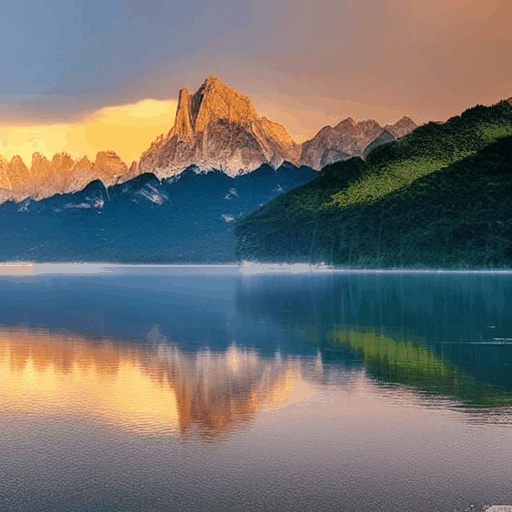

In [15]:
# Generating images using the interpolated embeddings.
images = []
for latent in tqdm(walked_embeddings):
    images.append(
        pipe(
            height=height,
            width=width,
            num_images_per_prompt=1,
            prompt_embeds=latent[0],
            negative_prompt_embeds=latent[1],
            num_inference_steps=num_inference_steps,
            guidance_scale=guidance_scale,
            generator=generator,
            latents=latents,
        ).images
    )

# Display of saved generated images.
display_images(images, save_path)